# Lead Scoring Case Study

### Problem statement:

X Education is an education company that sells online courses to industry professionals. Many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%, which is not a good number. 


### Business Objectives:

The company needs to improve their lead conversion score.  The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. Therefore X Education wishes to analyse the data to identify the most potential leads, also known as ‘Hot Leads’, i.e. the leads that are most likely to convert into paying customers.  They require a model to be built, wherein a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. This will help to increase the over all conversion rates as well as help the sales team to focus more on communicating with the potential leads.


In [176]:
# Importing the required libraries & Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
#changing the display options for rows and columns

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',200)

### Steps:

1. Reading and understanding the data
1. Cleaning the data, EDA & Data Visualization (univariate analysis, bivariate analysis, etc)
1. Outlier Analysis
1. Preparing the Data for modelling
1. Modelling the data
1. Model Prediction and Evaluation
1. Making predictions on the test set
1. Assigning Lead Score
1. Final analysis and Recommendation.

# 1. Reading and Understanding the data.

## Importing datasets

#### Reading the data in dataframe df

In [178]:
df = pd.read_csv("Leads.csv")

## Data understanding

In [179]:
#checking the top 5 rows of the dataframe 

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [180]:
#checking the info for dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [181]:
#Statistical description of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [182]:
#Checking the number of rows and columns in the dataframe

df.shape

(9240, 37)

# 2. Data Cleaning

## Checking for duplicate rows

In [183]:
#checking for any duplicates

df.duplicated().sum()

0

## Substituting null values in place of "Select" value

We can observe the value "Select" occurs many times in the dataset, which means no value has been specified in that case. These are as good as null values, as the customer has not selected any choice in these columns from the drop-down options.

In [184]:
# We check the number of times "Select" appears in each column of the dataframe.

df.isin(['Select']).sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [185]:
# We replace all the "Select" values with Nan

df = df.replace('Select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Finding the number of unique values in each column

In [186]:
# check unique values 

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Missing Values

We find the percentage of missing values in each column of the dataframe

In [187]:
# Checking the percentage of missing values in all columns

round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping the columns not significant for analysis  
  
    

We next drop the following columns from our dataset which are not significant for our analysis:  



-  **Prospect ID and Lead Number** : These columns are unique identifiers for the leads, and hence may be dropped.  We will add Lead number after modeling step to assign the Lead scores.

   
- **Tags, Last Activity,  Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score** : These columns have been filled by the Sales team post the lead generation, and hence may be removed as they are not available at the time of prediction.


-  **How did you hear about X Education,Lead Quality** : These columns which have more than 45% missing values.


-  **Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque** : These columns have only one single value, and hence will not add any significance to our analysis.




In [188]:
#dropping the above columns

columns_to_drop = ["Prospect ID", "Lead Number", "How did you hear about X Education", "Lead Profile","Lead Quality", 
                   "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score",
                   "Magazine", "Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content", 
                   "I agree to pay the amount through cheque", "Tags","Last Activity"]


df = df.drop(columns_to_drop, axis =1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [189]:
#check shape of dataframe

df.shape

(9240, 21)

## Missing value imputation

In [190]:
# Checking the percentage of missing values in all columns again

round(df.isnull().sum()/len(df)*100,2).sort_values()

Lead Origin                                       0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Source                                       0.39
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Country                                          26.63
What is your current occupation                  29.11
What matte

**We now take a look at each of the columns having missing values.**

**"Lead Source" column:**

In [191]:
df["Lead Source"].value_counts(dropna=False, normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Live Chat            0.000216
Social Media         0.000216
WeLearn              0.000108
NC_EDM               0.000108
testone              0.000108
Pay per Click Ads    0.000108
youtubechannel       0.000108
welearnblog_Home     0.000108
blog                 0.000108
Name: Lead Source, dtype: float64

In [192]:
df["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

**Observation:** We impute the NaN values with the mode, as the number of NaN values is much lesser compared to the mode value.

In [193]:
# impute NaN with mode
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

**"Page Views Per Visit" column:**

In [194]:
df["Page Views Per Visit"].value_counts(dropna=False, normalize=True)

0.00     0.236905
2.00     0.194264
3.00     0.129437
4.00     0.096970
1.00     0.070455
5.00     0.055952
1.50     0.033117
6.00     0.026407
2.50     0.026082
NaN      0.014827
7.00     0.014394
3.50     0.010173
8.00     0.009307
1.33     0.007143
1.67     0.006494
2.33     0.006385
2.67     0.005844
9.00     0.004870
4.50     0.004654
1.75     0.003030
3.33     0.002922
10.00    0.002706
1.25     0.002489
5.50     0.002273
2.25     0.002056
11.00    0.001948
3.67     0.001732
1.80     0.001407
6.50     0.001407
2.75     0.001299
1.40     0.001190
2.80     0.000974
2.20     0.000974
4.33     0.000974
14.00    0.000974
2.17     0.000866
1.60     0.000866
3.25     0.000866
2.40     0.000649
13.00    0.000649
12.00    0.000541
1.20     0.000541
15.00    0.000433
1.83     0.000433
2.60     0.000433
1.43     0.000433
1.71     0.000433
3.40     0.000433
1.38     0.000325
5.67     0.000325
16.00    0.000325
1.57     0.000325
4.75     0.000325
4.25     0.000325
1.78     0.000325
1.23     0

In [195]:
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

**Observation:** We impute the NaN values with the median, as the number of NaN values is much lesser compared to the median value.

In [196]:
# impute NaN with median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

**"TotalVisits" column:**

In [197]:
df["TotalVisits"].value_counts(dropna=False, normalize=True)

0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
NaN      0.014827
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
27.0     0.000541
25.0     0.000541
24.0     0.000541
22.0     0.000325
26.0     0.000216
29.0     0.000216
28.0     0.000216
115.0    0.000108
54.0     0.000108
43.0     0.000108
30.0     0.000108
32.0     0.000108
74.0     0.000108
251.0    0.000108
41.0     0.000108
141.0    0.000108
42.0     0.000108
55.0     0.000108
Name: TotalVisits, dtype: float64

In [198]:
df["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Observation:** We impute the NaN values with the median, as the number of NaN values is much lesser compared to the median value.

In [199]:
# impute NaN with median
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

**"Country" column:**

In [200]:
df["Country"].value_counts(dropna=False, normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Canada                  0.000433
Kuwait                  0.000433
Sweden                  0.000325
Ghana                   0.000216
Uganda                  0.000216
Belgium                 0.000216
Philippines             0.000216
Bangladesh              0.000216
Italy                   0.000216
Asia/Pacific Region     0.000216
Netherlands             0.000216
China                   0.000216
Tanzania                0.000108
Malaysia  

In [201]:
df["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

**Observation:** The value "India" occurs maximum times in the Country column, with 70% frequency. The null values aprroximately equal to 26%. If the null values are replaced by the mode, then approximately 97% of the values in this column will have the value India, hence it will become highly skewed. So we drop the country column.

In [202]:
df = df.drop("Country", axis =1)

**"What is your current occupation" column:**

In [203]:
df["What is your current occupation"].value_counts(dropna=False, normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [204]:
df["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

**Observation:** The null values aprroximately equal to 29%. If the null values are replaced by the mode, then approximately 89% of the values in this column will have value Unemployed, hence it will become highly skewed. Current occupation is an important criteria for people enrolling in courses, so we retain the null values in this column as "Unknown" category.

In [205]:
df['What is your current occupation'].replace(np.nan,'Unknown', inplace=True) # other replace

**"What matters most to you in choosing a course" column**

In [206]:
df["What matters most to you in choosing a course"].value_counts(dropna=False, normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [207]:
df["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

**Observation:** The value "Better Career Prospects" occurs maximum times in the "What matters most to you in choosing a course column, with 70% frequency. The null values aprroximately equal to 29%. If the null values are replaced by the mode, then approximately 99% of the values in this column will have the value "Better Career Prospects, hence it will become highly skewed. So we drop this column.

In [208]:
df = df.drop("What matters most to you in choosing a course", axis =1)

**"Specialization" column:**

In [209]:
df["Specialization"].value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [210]:
df["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

**Observation:** The null values approximately equal to 36%. so we retain the null values in this column as "Others" category.

In [211]:
df['Specialization'].replace(np.nan,'Others', inplace=True)

**"City" column:**

In [212]:
df["City"].value_counts(dropna=False, normalize=True) 

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [213]:
df['City'].replace(np.nan,'Other Cities', inplace=True)

In [214]:
df["City"].describe()

count             9240
unique               6
top       Other Cities
freq              4355
Name: City, dtype: object

**Observation:** The null values constitute 39% and are replaced by "Others" category

### Checking the null values percentage in all columns again

In [215]:
# Checking the percentage of missing values 

round(df.isnull().sum()/len(df)*100,2).sort_values()

Lead Origin                               0.0
City                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Specialization                            0.0
Last Notable Activity                     0.0
dtype: float64

**Observation on data retainment:**

We have retained 100% of the records in the dataset, as we have not dropped any rows during the imputation of missing values in our dataset. However, we have dropped columns with skewed data, high % of missing values, columns with single values, and columns manually entered by sales team post lead generation.

## Categorical Columns with multiple levels

In [216]:
# find the categorical columns in the dataframe

for i in df.columns[df.dtypes == 'object']:
    print(i)

Lead Origin
Lead Source
Do Not Email
Do Not Call
Specialization
What is your current occupation
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
City
A free copy of Mastering The Interview
Last Notable Activity


**"Lead Origin" column:**

In [217]:
df["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

**"Lead Source" column:**

In [218]:
df["Lead Source"].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Live Chat            0.000216
Social Media         0.000216
testone              0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
youtubechannel       0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
Name: Lead Source, dtype: float64

**Observation:** Here, we will combine together the categories "Google" and "google", and also club all the categories having normalized count less than 0.001 into a single category called "Others".

In [219]:
df['Lead Source'].replace( "google","Google", inplace=True)
df['Lead Source'].replace( ["bing","Click2call","Press_Release", "Social Media", "Live Chat", "blog","Pay per Click Ads",
"testone","welearnblog_Home", "welearnblog_Home", "WeLearn", "youtubechannel", "NC_EDM"], "Others", inplace=True)

In [220]:
df["Lead Source"].value_counts(normalize=True)

Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Facebook            0.005952
Others              0.002489
Name: Lead Source, dtype: float64

**"Specialization" column:**

In [221]:
df["Specialization"].value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

**"What is your current occupation" column**

In [222]:
df["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.606061
Unknown                 0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

**"Last Notable Activity" column**

In [223]:
df["Last Notable Activity"].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

**Observation:** Here, we will club all the categories having normalized count less than .01 into a single category called "Others".

In [224]:
df["Last Notable Activity"].replace( ["Email Bounced", "Unsubscribed", "Unreachable", "Had a Phone Conversation", "Approached upfront", "View in browser link Clicked",
"Email Marked Spam", "Email Received", "Resubscribed to emails", "Form Submitted on Website","Visited Booth in Tradeshow"], "Others", inplace=True)

In [225]:
df["Last Notable Activity"].value_counts(normalize=True)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Others                     0.017316
Name: Last Notable Activity, dtype: float64

**"A free copy of Mastering The Interview" column:**

In [226]:
df["A free copy of Mastering The Interview"].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

**"Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Do Not Email", columns**

In [227]:
df["Do Not Email"].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [228]:
df["Do Not Call"].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [229]:
df["Search"].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [230]:
df["Newspaper Article"].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [231]:
df["X Education Forums"].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [232]:
df["Newspaper"].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [233]:
df["Digital Advertisement"].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [234]:
df["Through Recommendations"].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

**Observation:** In the above columns, we notice that the variables are highly skewed as they contain a single value more than 99.9% times. Therefore, due to this imbalance, removing the columns will not affect our analysis and we drop these columns.

**Dropping skewed columns:**

In [235]:
df = df.drop(["Do Not Call","Do Not Email","Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations" ], axis =1)

## Numerical Columns

In [236]:
# find the numerical columns in the dataframe

for i in df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]:
    print(i)

Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit


In [237]:
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,0.0,1.0,3.0,5.0,10.0,17.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,0.0,12.0,248.0,936.0,1562.0,1840.61,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,0.0,1.0,2.0,3.0,6.0,9.00,55.0


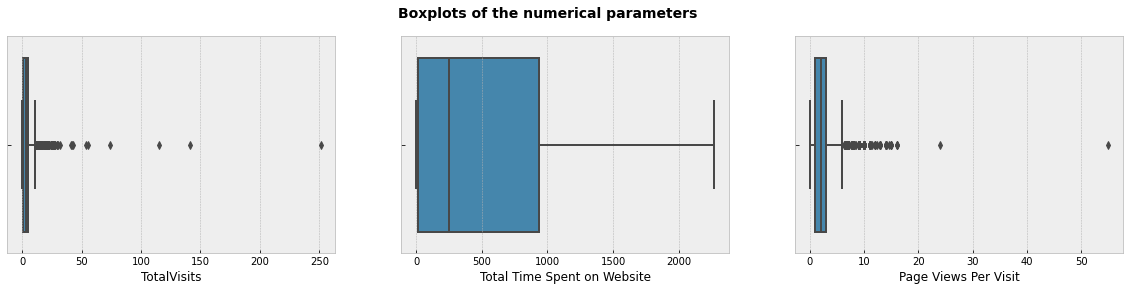

In [238]:
#box plots to check outliers
plt.style.use('bmh')
plt.figure(figsize=(20,4))
feature = df[["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]]
for i in enumerate(feature):
    plt.subplot(1,3, i[0]+1)
    sns.boxplot(df[i[1]])
plt.suptitle("Boxplots of the numerical parameters", fontsize = 14, fontweight="bold")
plt.show();

**Observation:** We will not drop outliers to avoid loss of information, but we will cap them at 99th percentile.

### Capping outliers

In [239]:
#define a function to cap higher outlier values at 99th percentile

def outlier_capping(dataset, column_name):
    cap_value = dataset[column_name].quantile(0.99)
    dataset[column_name][dataset[column_name]>= cap_value] = cap_value

In [240]:
#Capping the outliers for the numerical columns
outlier_capping(df, "TotalVisits")
outlier_capping(df, "Total Time Spent on Website")
outlier_capping(df, "Page Views Per Visit")

In [241]:
# summary statistics after capping outliers
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,0.0,1.0,1.0,1.0000,1.00
TotalVisits,9240.0,3.327814,3.228466,0.0,0.0,1.0,3.0,5.0,10.0,17.0000,17.00
Total Time Spent on Website,9240.0,486.510793,544.845436,0.0,0.0,12.0,248.0,936.0,1562.0,1840.3721,1840.61
Page Views Per Visit,9240.0,2.329050,1.971347,0.0,0.0,1.0,2.0,3.0,6.0,9.0000,9.00


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   float64
 5   Page Views Per Visit                    9240 non-null   float64
 6   Specialization                          9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   City                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

# 3. EDA & Data Visualization

## Distribution plots of numeric variables

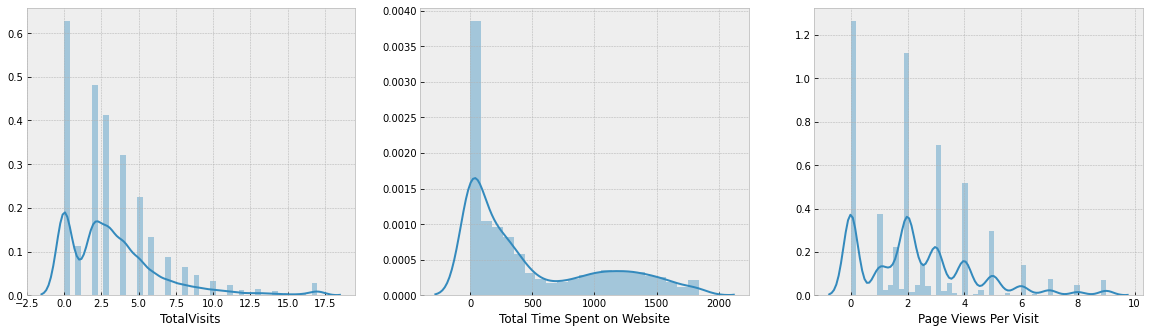

In [243]:
#Distribution  plots of numeric variables
plt.style.use('bmh')
plt.figure(figsize=(20,18))
feature = df[["TotalVisits","Total Time Spent on Website", "Page Views Per Visit"]]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])
plt.show();

**Inferences:** 

The average visit made by the customer on the website is around 3 (median value)

The average time spent by the customer on the website is around 248 (median value)

Average number of pages on the website viewed during the visits is 2 (median value)

## Analysis of categorical variables w.r.t "Converted" column

In [244]:
# We define a custom function for analysis of categorical columns.
# This custom functions plots grouped barplots for the categorical variables, for Converted=1 and Converted=0 respectively.
# The categorical variable plotted on x-axis, the count of that variable is plotted on y-axis, and the hue determines the Converted status.

def catg_analysis(x1,x2):
    plt.title( x1 + " - Analysis by Converted status")
    sns.countplot(x = x1, hue = x2, data = df)
    plt.xticks(rotation=90)


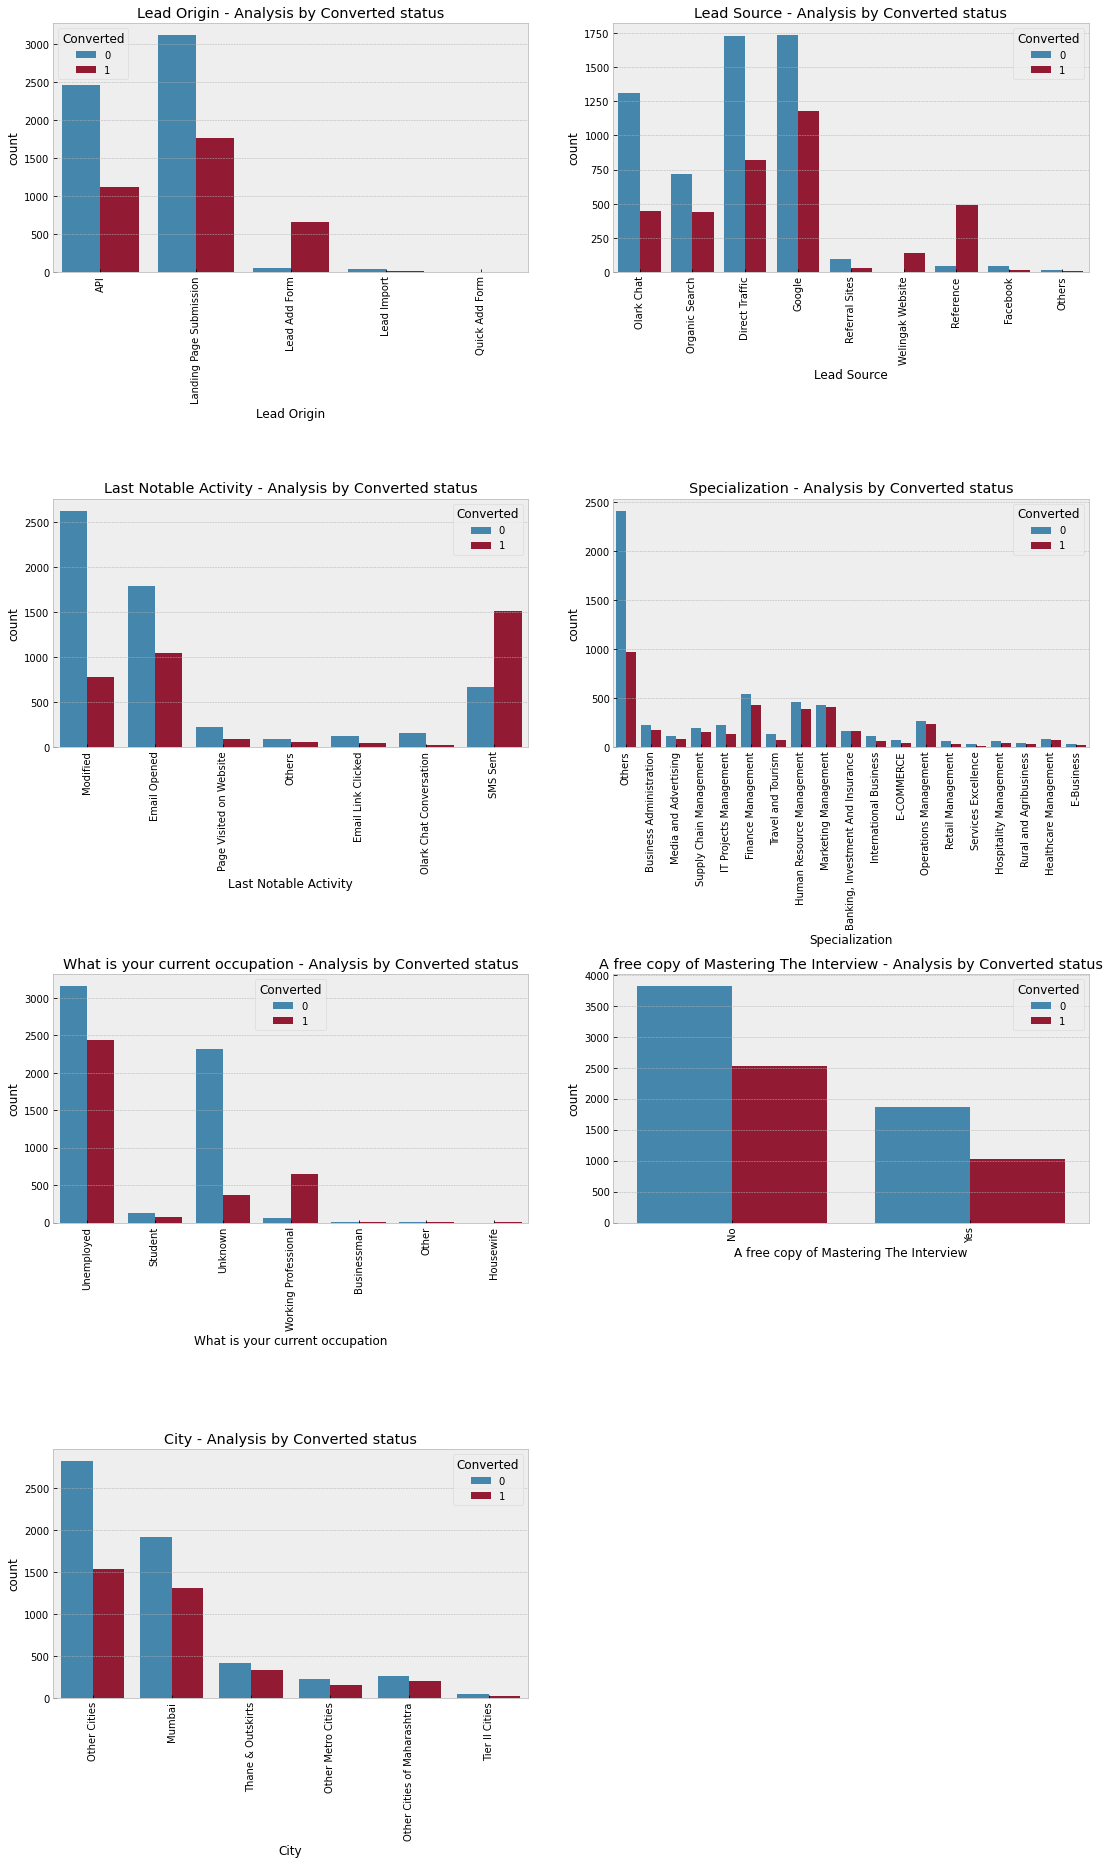

In [245]:
plt.figure(figsize=(16,26))

plt.subplot(4,2,1)
catg_analysis("Lead Origin","Converted")

plt.subplot(4,2,2)
catg_analysis("Lead Source","Converted")


plt.subplot(4,2,3)
catg_analysis("Last Notable Activity","Converted")

plt.subplot(4,2,4)
catg_analysis("Specialization","Converted")

plt.subplot(4,2,5)
catg_analysis("What is your current occupation","Converted")


plt.subplot(4,2,6)
catg_analysis("A free copy of Mastering The Interview","Converted")

plt.subplot(4,2,7)
catg_analysis("City","Converted")

plt.tight_layout()
plt.show();

**Inferences:**

1. When the Lead Origin is Lead Add form, then there is a higher chance of conversion.

2. Leads acquired through Welingak website and Reference sources have higher chance of conversion. The conversion rates from Olark chat and Direct Traffic are much lower.

3. Leads having "SMS Sent" as their Last Notable Activity status are more likely to convert.

4. Chances of conversion are highest in Working professionals among the different occupations.

5. We are unable to make any significant inferences from "Specialization", "City", & "A free copy of mastering the interview" columns.


## Analysis of numerical variables w.r.t "Converted" column

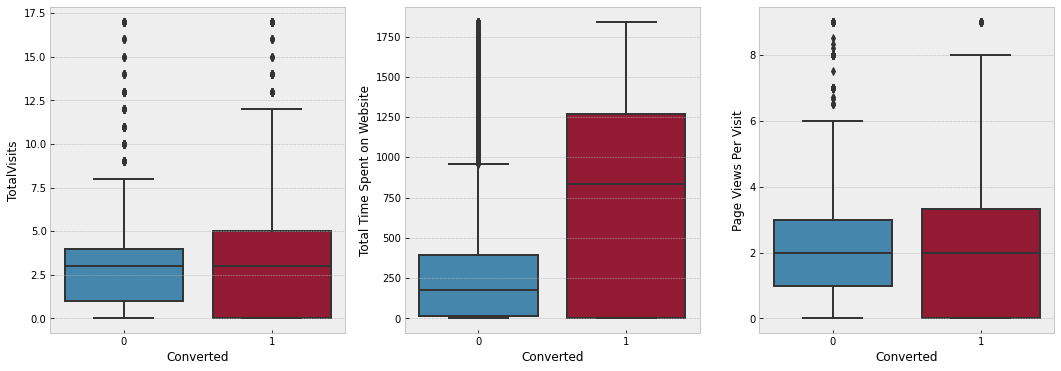

In [246]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data=df)

plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data=df)

plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data=df)

plt.show()

**Inferences:**

Leads who have made higher number of visits on the website, spent more time on the website and viewed higher number of pages on the website during the visits are more likely to convert.

## Analysis of correlation for numerical parameters

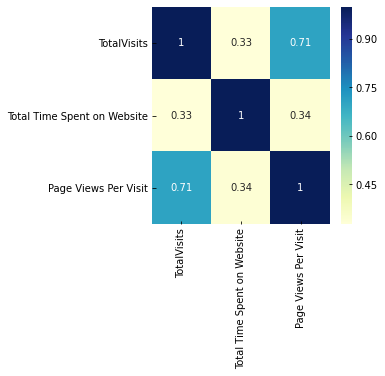

In [247]:
#Heatmap showing Correlation for numerical parameters
corr1 = df[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr1, cmap="YlGnBu",annot=True)
plt.show()

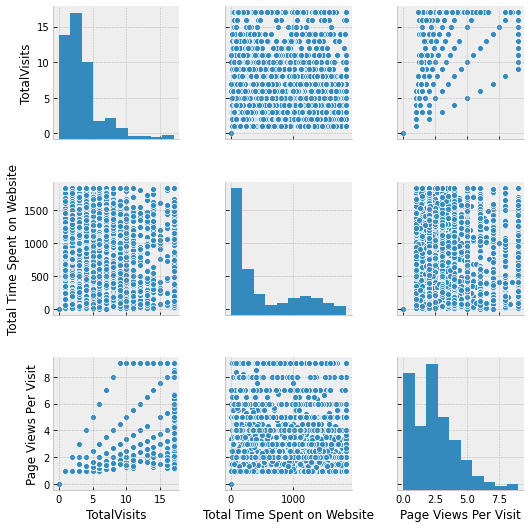

In [248]:
#plotting pairplot
sns.pairplot(df[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])
plt.show()

**Inferences:**

Moderate positive correlation can be observed between "TotalVisits" and "Page Views Per Visit". Customers who have made higher number of visits on the website, have also viewed higher number of pages during their visit.

# 4. Data Preparation

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   float64
 5   Page Views Per Visit                    9240 non-null   float64
 6   Specialization                          9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   City                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

## Creating Dummy variables for the categorical variables with multiple levels (one-hot encoded)

In [250]:
# creating required dummy variables
df_LeadOrigin = pd.get_dummies(df["Lead Origin"], drop_first = True, prefix = 'LeadOrigin')

df_LeadSource = pd.get_dummies(df["Lead Source"], prefix = 'LeadSource')
df_LeadSource = df_LeadSource.drop(["LeadSource_Others"],1)

df_City = pd.get_dummies(df["City"], prefix = 'City')
df_City = df_City.drop(["City_Other Cities"],1)

df_Specialization = pd.get_dummies(df["Specialization"], prefix = 'Specialization' )
df_Specialization = df_Specialization.drop(["Specialization_Others"],1)

df_CurrentOccupation = pd.get_dummies(df["What is your current occupation"], prefix = 'CurrentOccupation')
df_CurrentOccupation = df_CurrentOccupation.drop(["CurrentOccupation_Unknown"],1)

df_LastNotableActivity = pd.get_dummies(df["Last Notable Activity"], prefix = 'LastNotableActivity')
df_LastNotableActivity = df_LastNotableActivity.drop(["LastNotableActivity_Others"],1)

In [251]:
# Concat the dataframes with the dummy variables
df = pd.concat([df, df_LeadOrigin, df_LeadSource,df_Specialization, df_CurrentOccupation, df_LastNotableActivity,df_City ], axis=1)
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0.0,0.0,Others,Unemployed,Other Cities,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674.0,2.5,Others,Unemployed,Other Cities,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Business Administration,Student,Mumbai,Yes,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Others,Unemployed,Mumbai,No,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


## Converting binary variables (Yes/No) to 0/1

In [252]:
# variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
df[varlist] = df[varlist].apply(binary_map)

In [253]:
# Drop the variables no longer required, as dummy variables have already been created for them

columns_to_drop = ["Lead Origin","Lead Source","City","Specialization","What is your current occupation","Last Notable Activity"]
df = df.drop(columns_to_drop, axis =1)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,1,2.0,1428.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [254]:
#Checking the columns of the final dataframe
print(df.columns)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'LeadOrigin_Quick Add Form', 'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites', 'LeadSource_Welingak Website', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management',
       'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Operations

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9240 non-null   int64  
 1   TotalVisits                                       9240 non-null   float64
 2   Total Time Spent on Website                       9240 non-null   float64
 3   Page Views Per Visit                              9240 non-null   float64
 4   A free copy of Mastering The Interview            9240 non-null   int64  
 5   LeadOrigin_Landing Page Submission                9240 non-null   uint8  
 6   LeadOrigin_Lead Add Form                          9240 non-null   uint8  
 7   LeadOrigin_Lead Import                            9240 non-null   uint8  
 8   LeadOrigin_Quick Add Form                         9240 non-null   uint8  
 9   LeadSource_Direct T

## Train-Test Split

In [256]:
# Putting feature variable to X
X = df.drop(["Converted"], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1.0,305.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,2.0,1428.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [257]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [258]:
#Dividing the dataset into train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [259]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6795,0.205373,0.007668,-0.503379,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3516,0.512365,-0.693060,0.092260,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8105,0.512365,1.374181,1.364995,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3934,-1.022595,-0.888014,-1.180474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [260]:
### Checking the Conversion Rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

38.53896103896104

**Observation:** The current conversion rate is approximately 38%

# 5. Model Building

## Running the First Training Model without RFE

In [261]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6416
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.0
Date:                Sun, 25 Oct 2020   Deviance:                       5201.9
Time:                        18:43:14   Pearson chi2:                 6.79e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.4606      0.672     -2.175      0.030      -2.777      -0.144
TotalVisits                                          0.2879      0.050      5.771      0.000       0.190       0.386
Total Time Spent on Website                          1.0908      0.040     26.976      0.000       1.012       1.170
Page Views Per Visit                                -0.2315      0.056     -4.113      0.000      -0.342      -0.121
A free copy of Mastering The Interview              -0.2305      0.109     -2.118      0.034      -0.444      -0.017
LeadOrigin_Landing Page Submission                  -0.9080      0.142     -6.374      0.000      -1.187      -0.629
LeadOrigin_Lead Add Form                             2.2927      0.483      4.745      0.000       1.346       3.240
LeadOrigin_Lead Import                               0.4756      1.849      0.257      0.797      -3.148       4.100
LeadOrigin_Quick Add Form                           20.0510   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Direct Traffic                           -0.5420      0.627     -0.865      0.387      -1.771       0.687
LeadSource_Facebook                                 -1.0070      1.951     -0.516      0.606      -4.830       2.816
LeadSource_Google                                   -0.2678      0.622     -0.431      0.667      -1.487       0.951
LeadSource_Olark Chat                                0.6877      0.634      1.085      0.278      -0.554       1.929
LeadSource_Organic Search                           -0.4218      0.630     -0.669      0.503      -1.657       0.813
LeadSource_Reference                                 0.4887      0.740      0.661      0.509      -0.961       1.938
LeadSource_Referral Sites                           -0.4578      0.693     -0.660      0.509      -1.817       0.901
LeadSource_Welingak Website                          2.8661      1.015      2.824      0.005       0.877       4.855
Specialization_Banking, Investment And Insurance     1.0941      0.227      4.828      0.000       0.650       1.538
Specialization_Business Administration               0.7864      0.212      3.709      0.000       0.371       1.202
Specialization_E-Business                            1.1332      0.476      2.379      0.017       0.199       2.067
Specialization_E-COMMERCE                            1.2540      0.329      3.810      0.000       0.609       1.899
Specialization_Finance Management                    1.0885      0.173      6.286      0.000       0.749       1.428
Specialization_Healthcare Management                 1.0242      0.306      3.342      0.001       0.424       1.625
Specialization_Hospitality Management    

## Feature Selection Using RFE- Selecting the top 20 variables

In [262]:
#Running RFE for 20 predictor variables

logreg = LogisticRegression()
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [263]:
#displaying the features selected and the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 25),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 24),
 ('LeadOrigin_Quick Add Form', False, 32),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Olark Chat', False, 17),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Reference', False, 18),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 5),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', Fa

In [264]:
# Checking the selected variables
cols_selected = X_train.columns[rfe.support_]
cols_selected 

Index(['Total Time Spent on Website', 'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'Specialization_Banking, Investment And Insurance', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management',
       'Specialization_Rural and Agribusiness', 'CurrentOccupation_Housewife', 'CurrentOccupation_Student', 'CurrentOccupation_Unemployed', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_SMS Sent'],
      dtype='object')

## Building the model with the selected variables, using statsmodel for the detailed statistics

**Model 1**

In [265]:
# Building Model 1 with RFE selected variables

X_train_sm = sm.add_constant(X_train[cols_selected])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.3
Date:                Sun, 25 Oct 2020   Deviance:                       5330.7
Time:                        18:43:16   Pearson chi2:                 6.70e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8940      0.108     -8.292      0.000      -1.105      -0.683
Total Time Spent on Website                          1.1041      0.039     27.985      0.000       1.027       1.181
LeadOrigin_Lead Add Form                             2.4444      0.193     12.650      0.000       2.066       2.823
LeadSource_Direct Traffic                           -1.5278      0.116    -13.216      0.000      -1.754      -1.301
LeadSource_Facebook                                 -1.0584      0.519     -2.038      0.042      -2.076      -0.041
LeadSource_Google                                   -1.0037      0.108     -9.287      0.000      -1.216      -0.792
LeadSource_Organic Search                           -1.2675      0.134     -9.483      0.000      -1.529      -1.006
LeadSource_Referral Sites                           -1.1949      0.317     -3.774      0.000      -1.815      -0.574
LeadSource_Welingak Website                          1.8995      0.742      2.559      0.011       0.445       3.354
Specialization_Banking, Investment And Insurance     0.3874      0.184      2.108      0.035       0.027       0.748
Specialization_E-COMMERCE                            0.4723      0.296      1.597      0.110      -0.107       1.052
Specialization_Finance Management                    0.3185      0.113      2.825      0.005       0.098       0.540
Specialization_Healthcare Management                 0.3558      0.271      1.312      0.189      -0.176       0.887
Specialization_Rural and Agribusiness                0.6554      0.387      1.693      0.091      -0.104       1.414
CurrentOccupation_Housewife                         23.8309   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
CurrentOccupation_Student                            1.0235      0.238      4.306      0.000       0.558       1.489
CurrentOccupation_Unemployed                         1.0269      0.086     11.893      0.000       0.858       1.196
CurrentOccupation_Working Professional               3.5496      0.198     17.965      0.000       3.162       3.937
LastNotableActivity_Modified                        -0.7240      0.084     -8.656      0.000      -0.888      -0.560
LastNotableActivity_Olark Chat Conversation         -1.0971      0.334     -3.283      0.001      -1.752      -0.442
LastNotableActivity_SMS Sent                         1.2241      0.085     14.402      0.000       1.057       1.391
====================================================================================================================
"""

**Model 2**

The p-value of the variable "CurrentOccupation_Housewife" = 0.999, is higher than the significance level of 0.05 . This variable is insignificant in presence of other variables, hence we drop this and update the model.

In [266]:
# Dropping the variable "CurrentOccupation_Housewife"

cols_selected = cols_selected.drop('CurrentOccupation_Housewife',1)

In [267]:
# Building Model 2

X_train_sm = sm.add_constant(X_train[cols_selected])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.3
Date:                Sun, 25 Oct 2020   Deviance:                       5352.7
Time:                        18:43:16   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8726      0.107     -8.139      0.000      -1.083      -0.662
Total Time Spent on Website                          1.1025      0.039     28.006      0.000       1.025       1.180
LeadOrigin_Lead Add Form                             2.4901      0.193     12.918      0.000       2.112       2.868
LeadSource_Direct Traffic                           -1.5198      0.115    -13.172      0.000      -1.746      -1.294
LeadSource_Facebook                                 -1.0564      0.519     -2.035      0.042      -2.074      -0.039
LeadSource_Google                                   -0.9931      0.108     -9.209      0.000      -1.204      -0.782
LeadSource_Organic Search                           -1.2555      0.133     -9.415      0.000      -1.517      -0.994
LeadSource_Referral Sites                           -1.1934      0.316     -3.775      0.000      -1.813      -0.574
LeadSource_Welingak Website                          1.8615      0.742      2.508      0.012       0.407       3.316
Specialization_Banking, Investment And Insurance     0.3843      0.184      2.092      0.036       0.024       0.744
Specialization_E-COMMERCE                            0.4684      0.295      1.586      0.113      -0.110       1.047
Specialization_Finance Management                    0.3253      0.112      2.899      0.004       0.105       0.545
Specialization_Healthcare Management                 0.4033      0.269      1.497      0.134      -0.125       0.931
Specialization_Rural and Agribusiness                0.6528      0.387      1.687      0.092      -0.106       1.411
CurrentOccupation_Student                            0.9923      0.238      4.176      0.000       0.527       1.458
CurrentOccupation_Unemployed                         0.9965      0.086     11.650      0.000       0.829       1.164
CurrentOccupation_Working Professional               3.5170      0.197     17.837      0.000       3.131       3.903
LastNotableActivity_Modified                        -0.7236      0.083     -8.678      0.000      -0.887      -0.560
LastNotableActivity_Olark Chat Conversation         -1.1060      0.334     -3.312      0.001      -1.760      -0.452
LastNotableActivity_SMS Sent                         1.2177      0.085     14.343      0.000       1.051       1.384
====================================================================================================================
"""

In [268]:
# Calculate the VIF of the new model 2

vif = pd.DataFrame()
X = X_train[cols_selected]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,CurrentOccupation_Unemployed,2.81
4,LeadSource_Google,2.00
2,LeadSource_Direct Traffic,1.92
1,LeadOrigin_Lead Add Form,1.65
16,LastNotableActivity_Modified,1.60
18,LastNotableActivity_SMS Sent,1.59
5,LeadSource_Organic Search,1.40
15,CurrentOccupation_Working Professional,1.37
7,LeadSource_Welingak Website,1.24
10,Specialization_Finance Management,1.16


**Model 3**

We drop the variable Specialization_Healthcare Management with the highest p-value 0.134 higher than significance level.

In [269]:
# Dropping the variable "Specialization_Healthcare Management"

cols_selected = cols_selected.drop('Specialization_Healthcare Management',1)

In [270]:
# Building Model 3

X_train_sm = sm.add_constant(X_train[cols_selected])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.5
Date:                Sun, 25 Oct 2020   Deviance:                       5354.9
Time:                        18:43:17   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8680      0.107     -8.102      0.000      -1.078      -0.658
Total Time Spent on Website                          1.1031      0.039     28.026      0.000       1.026       1.180
LeadOrigin_Lead Add Form                             2.5042      0.193     13.003      0.000       2.127       2.882
LeadSource_Direct Traffic                           -1.5106      0.115    -13.117      0.000      -1.736      -1.285
LeadSource_Facebook                                 -1.0325      0.517     -1.996      0.046      -2.046      -0.019
LeadSource_Google                                   -0.9920      0.108     -9.201      0.000      -1.203      -0.781
LeadSource_Organic Search                           -1.2380      0.133     -9.329      0.000      -1.498      -0.978
LeadSource_Referral Sites                           -1.1951      0.316     -3.780      0.000      -1.815      -0.575
LeadSource_Welingak Website                          1.8563      0.742      2.501      0.012       0.401       3.311
Specialization_Banking, Investment And Insurance     0.3745      0.184      2.040      0.041       0.015       0.734
Specialization_E-COMMERCE                            0.4573      0.295      1.549      0.121      -0.121       1.036
Specialization_Finance Management                    0.3161      0.112      2.822      0.005       0.097       0.536
Specialization_Rural and Agribusiness                0.6400      0.387      1.654      0.098      -0.119       1.398
CurrentOccupation_Student                            0.9958      0.237      4.199      0.000       0.531       1.461
CurrentOccupation_Unemployed                         0.9949      0.085     11.637      0.000       0.827       1.162
CurrentOccupation_Working Professional               3.5235      0.197     17.868      0.000       3.137       3.910
LastNotableActivity_Modified                        -0.7265      0.083     -8.716      0.000      -0.890      -0.563
LastNotableActivity_Olark Chat Conversation         -1.1110      0.334     -3.328      0.001      -1.765      -0.457
LastNotableActivity_SMS Sent                         1.2163      0.085     14.332      0.000       1.050       1.383
====================================================================================================================
"""

In [271]:
# Calculate the VIF of the new model 3

vif = pd.DataFrame()
X = X_train[cols_selected]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,CurrentOccupation_Unemployed,2.81
4,LeadSource_Google,2.00
2,LeadSource_Direct Traffic,1.90
1,LeadOrigin_Lead Add Form,1.65
15,LastNotableActivity_Modified,1.60
17,LastNotableActivity_SMS Sent,1.59
5,LeadSource_Organic Search,1.38
14,CurrentOccupation_Working Professional,1.36
7,LeadSource_Welingak Website,1.24
10,Specialization_Finance Management,1.16


**Model 4**

We drop the variable Specialization_E-COMMERCE with the highest p-value 0.121 higher than significance level.

In [272]:
# Dropping the variable "Specialization_E-COMMERCE"

cols_selected = cols_selected.drop('Specialization_E-COMMERCE',1)

In [273]:
# Building Model 4

X_train_sm = sm.add_constant(X_train[cols_selected])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.6
Date:                Sun, 25 Oct 2020   Deviance:                       5357.3
Time:                        18:43:17   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8694      0.107     -8.118      0.000      -1.079      -0.659
Total Time Spent on Website                          1.1010      0.039     28.016      0.000       1.024       1.178
LeadOrigin_Lead Add Form                             2.5028      0.193     12.998      0.000       2.125       2.880
LeadSource_Direct Traffic                           -1.4958      0.115    -13.044      0.000      -1.721      -1.271
LeadSource_Facebook                                 -1.0323      0.517     -1.996      0.046      -2.046      -0.019
LeadSource_Google                                   -0.9859      0.108     -9.155      0.000      -1.197      -0.775
LeadSource_Organic Search                           -1.2262      0.132     -9.263      0.000      -1.486      -0.967
LeadSource_Referral Sites                           -1.1937      0.316     -3.776      0.000      -1.813      -0.574
LeadSource_Welingak Website                          1.8556      0.742      2.500      0.012       0.401       3.311
Specialization_Banking, Investment And Insurance     0.3651      0.183      1.991      0.046       0.006       0.725
Specialization_Finance Management                    0.3070      0.112      2.746      0.006       0.088       0.526
Specialization_Rural and Agribusiness                0.6312      0.387      1.632      0.103      -0.127       1.389
CurrentOccupation_Student                            0.9912      0.237      4.183      0.000       0.527       1.456
CurrentOccupation_Unemployed                         0.9950      0.085     11.639      0.000       0.827       1.163
CurrentOccupation_Working Professional               3.5259      0.197     17.870      0.000       3.139       3.913
LastNotableActivity_Modified                        -0.7237      0.083     -8.686      0.000      -0.887      -0.560
LastNotableActivity_Olark Chat Conversation         -1.1114      0.334     -3.331      0.001      -1.765      -0.457
LastNotableActivity_SMS Sent                         1.2189      0.085     14.368      0.000       1.053       1.385
====================================================================================================================
"""

In [274]:
# Calculate the VIF of the new model 4

vif = pd.DataFrame()
X = X_train[cols_selected]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,CurrentOccupation_Unemployed,2.81
4,LeadSource_Google,1.99
2,LeadSource_Direct Traffic,1.88
1,LeadOrigin_Lead Add Form,1.65
14,LastNotableActivity_Modified,1.60
16,LastNotableActivity_SMS Sent,1.59
5,LeadSource_Organic Search,1.38
13,CurrentOccupation_Working Professional,1.36
7,LeadSource_Welingak Website,1.24
9,Specialization_Finance Management,1.16


**Model 5**

We drop the variable Specialization_Rural and Agribusiness with the highest p-value 0.103  higher than significance level.

In [275]:
# Dropping the variable "Specialization_Rural and Agribusiness"

cols_selected = cols_selected.drop('Specialization_Rural and Agribusiness',1)

In [276]:
# Building Model 5

X_train_sm = sm.add_constant(X_train[cols_selected])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.9
Date:                Sun, 25 Oct 2020   Deviance:                       5359.9
Time:                        18:43:18   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8678      0.107     -8.105      0.000      -1.078      -0.658
Total Time Spent on Website                          1.1003      0.039     28.015      0.000       1.023       1.177
LeadOrigin_Lead Add Form                             2.5051      0.193     13.010      0.000       2.128       2.883
LeadSource_Direct Traffic                           -1.4916      0.115    -13.017      0.000      -1.716      -1.267
LeadSource_Facebook                                 -1.0355      0.517     -2.002      0.045      -2.049      -0.022
LeadSource_Google                                   -0.9851      0.108     -9.149      0.000      -1.196      -0.774
LeadSource_Organic Search                           -1.2134      0.132     -9.193      0.000      -1.472      -0.955
LeadSource_Referral Sites                           -1.1797      0.317     -3.727      0.000      -1.800      -0.559
LeadSource_Welingak Website                          1.8501      0.742      2.492      0.013       0.395       3.305
Specialization_Banking, Investment And Insurance     0.3580      0.183      1.953      0.051      -0.001       0.717
Specialization_Finance Management                    0.3011      0.112      2.695      0.007       0.082       0.520
CurrentOccupation_Student                            1.0155      0.236      4.300      0.000       0.553       1.478
CurrentOccupation_Unemployed                         0.9983      0.085     11.681      0.000       0.831       1.166
CurrentOccupation_Working Professional               3.5266      0.197     17.881      0.000       3.140       3.913
LastNotableActivity_Modified                        -0.7268      0.083     -8.727      0.000      -0.890      -0.564
LastNotableActivity_Olark Chat Conversation         -1.1160      0.334     -3.346      0.001      -1.770      -0.462
LastNotableActivity_SMS Sent                         1.2151      0.085     14.338      0.000       1.049       1.381
====================================================================================================================
"""

In [277]:
# Calculate the VIF of the new model 5

vif = pd.DataFrame()
X = X_train[cols_selected]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,CurrentOccupation_Unemployed,2.81
4,LeadSource_Google,1.99
2,LeadSource_Direct Traffic,1.88
1,LeadOrigin_Lead Add Form,1.65
13,LastNotableActivity_Modified,1.60
15,LastNotableActivity_SMS Sent,1.59
5,LeadSource_Organic Search,1.37
12,CurrentOccupation_Working Professional,1.36
7,LeadSource_Welingak Website,1.24
9,Specialization_Finance Management,1.16


**Model 6**

We drop the variable Specialization_Banking, Investment And Insurance with the highest p-value  0.051 higher than significance level.

In [278]:
# Dropping the variable "Specialization_Banking, Investment And Insurance"

cols_selected = cols_selected.drop('Specialization_Banking, Investment And Insurance',1)

In [279]:
# Building Model 6

X_train_sm = sm.add_constant(X_train[cols_selected])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.8
Date:                Sun, 25 Oct 2020   Deviance:                       5363.6
Time:                        18:43:18   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.8651      0.107     -8.086      0.000      -1.075      -0.655
Total Time Spent on Website                     1.1003      0.039     28.031      0.000       1.023       1.177
LeadOrigin_Lead Add Form                        2.5111      0.192     13.048      0.000       2.134       2.888
LeadSource_Direct Traffic                      -1.4744      0.114    -12.922      0.000      -1.698      -1.251
LeadSource_Facebook                            -1.0393      0.517     -2.008      0.045      -2.053      -0.025
LeadSource_Google                              -0.9751      0.107     -9.072      0.000      -1.186      -0.764
LeadSource_Organic Search                      -1.2036      0.132     -9.134      0.000      -1.462      -0.945
LeadSource_Referral Sites                      -1.1737      0.317     -3.707      0.000      -1.794      -0.553
LeadSource_Welingak Website                     1.8390      0.742      2.477      0.013       0.384       3.294
Specialization_Finance Management               0.2835      0.111      2.547      0.011       0.065       0.502
CurrentOccupation_Student                       1.0297      0.236      4.372      0.000       0.568       1.491
CurrentOccupation_Unemployed                    1.0024      0.085     11.732      0.000       0.835       1.170
CurrentOccupation_Working Professional          3.5269      0.197     17.897      0.000       3.141       3.913
LastNotableActivity_Modified                   -0.7293      0.083     -8.762      0.000      -0.892      -0.566
LastNotableActivity_Olark Chat Conversation    -1.1213      0.333     -3.363      0.001      -1.775      -0.468
LastNotableActivity_SMS Sent                    1.2155      0.085     14.347      0.000       1.049       1.382
===============================================================================================================
"""

In [280]:
# Calculate the VIF of the new model 6

vif = pd.DataFrame()
X = X_train[cols_selected]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CurrentOccupation_Unemployed,2.80
4,LeadSource_Google,1.98
2,LeadSource_Direct Traffic,1.86
1,LeadOrigin_Lead Add Form,1.64
12,LastNotableActivity_Modified,1.60
14,LastNotableActivity_SMS Sent,1.59
5,LeadSource_Organic Search,1.37
11,CurrentOccupation_Working Professional,1.36
7,LeadSource_Welingak Website,1.24
8,Specialization_Finance Management,1.15


**Observation: Now we have the final model, in which all the variables have a p-value which is less than the significance level of 0.05, and a VIF lower than 5 (low multicollinearity). So we proceed with this model for model prediction.**

# 6. Model Prediction

In [281]:
# Getting the predicted values on the train set with our final model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.301563
6795    0.209365
3516    0.348566
8105    0.868719
3934    0.172331
4844    0.988630
3297    0.133380
8071    0.984579
987     0.109488
7423    0.928481
dtype: float64

In [282]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30156314, 0.2093647 , 0.34856564, 0.86871897, 0.17233055,
       0.98862986, 0.13337965, 0.98457898, 0.1094878 , 0.92848063])

### Creating a dataframe with the actual Converted value and the predicted probabilities

In [283]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID
0,0,0.301563,1871
1,0,0.209365,6795
2,0,0.348566,3516
3,0,0.868719,8105
4,0,0.172331,3934


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [284]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# check the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted
0,0,0.301563,1871,0
1,0,0.209365,6795,0
2,0,0.348566,3516,0
3,0,0.868719,8105,1
4,0,0.172331,3934,0


# 7. Model Evaluation

### Evaluation metrics on train set: sensitivity-specificity

#### Metrics calculated with cut-off = 0.5 chosen arbitrarily

**Confusion matrix**

In [285]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3567  435]
 [ 754 1712]]


**Overall accuracy**

In [287]:
# We check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8161719233147805


**Metrics beyond simply accuracy**

In [288]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Sensitivity**

In [289]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.6942416869424168

**Specificity**

In [290]:
# specificity of our logistic regression model
TN / float(TN+FP)

0.8913043478260869

**False postive rate**

In [291]:
# Calculate false postive rate - predicting Converted when lead has not converted
print(FP/ float(TN+FP))

0.10869565217391304


**Positive predictive value**

In [292]:
# positive predictive value 
print (TP / float(TP+FP))

0.7973917093619003


**Negative predictive value**

In [293]:
# Negative predictive value
print (TN / float(TN+ FN))

0.825503355704698


### Plotting the ROC Curve

In [294]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [295]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

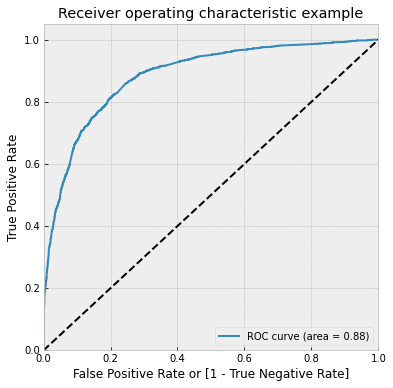

In [296]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Observation:**  The area under the ROC curve is 0.88, which indicates the classification model is performing well.

###  Finding Optimal Cutoff Point

**We find the Optimal cutoff probability, where we get balanced sensitivity and specificity.**

In [297]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301563,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.209365,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.348566,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.868719,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.172331,3934,0,1,1,0,0,0,0,0,0,0,0


In [298]:
# Next calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.615028  0.967559  0.397801
0.2   0.2  0.763915  0.906326  0.676162
0.3   0.3  0.794218  0.858881  0.754373
0.4   0.4  0.811379  0.758313  0.844078
0.5   0.5  0.816172  0.694242  0.891304
0.6   0.6  0.798237  0.597324  0.922039
0.7   0.7  0.783859  0.519870  0.946527
0.8   0.8  0.759431  0.420925  0.968016
0.9   0.9  0.717532  0.278994  0.987756


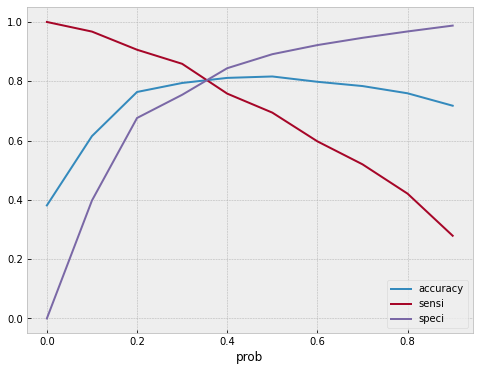

In [299]:
# Next we plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,6))
plt.show()

**Observation: From the above accuracy-sensitivity-specificity curve, we take 0.3 as the optimum cutoff probability point.**

In [300]:
#Adding the final prediction column for cutoff point 0.3

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.301563,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.209365,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.348566,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.868719,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172331,3934,0,1,1,0,0,0,0,0,0,0,0,0


#### Metrics calculated with cut-off = 0.3

**Overall accuracy**

In [301]:
#  overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.79421768707483

**Confusion matrix**

In [302]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3019,  983],
       [ 348, 2118]], dtype=int64)

**Metrics beyond simply accuracy**

In [303]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

**Sensitivity**

In [304]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8588807785888077

**Specificity**

In [305]:
# specificity of our logistic regression model
TN / float(TN+FP)

0.7543728135932034

**False postive rate**

In [306]:
# Calculate false postive rate - predicting converted when lead does not convert
print(FP/ float(TN+FP))

0.2456271864067966


**Positive predictive value**

In [307]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6830054821025475


**Negative predictive value**

In [308]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8966438966438967


### Evaluation metrics on train set: Precision and Recall

#### Metrics calculated with cut-off = 0.5

**Confusion matrix**

In [309]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3567,  435],
       [ 754, 1712]], dtype=int64)

**Precision**

In [310]:
# precision of our logistic regression model
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7973917093619003

**Recall**

In [311]:
# recall of our logistic regression model
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.6942416869424168

**F1 score**

In [312]:
#F1 Score is the 2*((precision*recall)/(precision+recall))
#F1 score conveys the balance between the precision and the recall
F1 = 2*((precision*recall)/(precision+recall))
F1

0.7422501625840017

### Precision and recall tradeoff

In [313]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [314]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

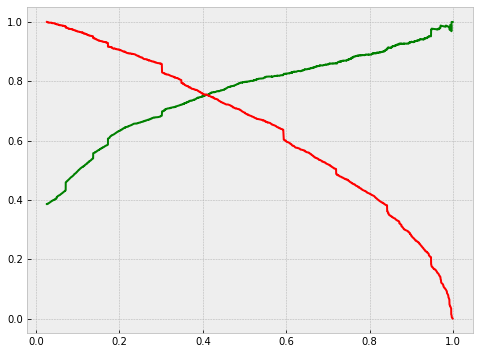

In [315]:
# plot precision vs recall
plt.figure(figsize=(8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Observation: From the above precision vs recall curve, we can take 0.4 as the optimum cutoff probability point.**

# 8. Making predictions on the test set

In [316]:
# scaling the numeric features
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [317]:
# X_test with the features selected by our final model
X_test = X_test[cols_selected]
X_test.head()

,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Organic Search,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Finance Management,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_SMS Sent
4269,0.971400,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2376,-0.888014,1,0,0,0,0,0,0,0,0,1,0,0,0,1
7766,-0.779502,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9199,-0.888014,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4359,-0.888014,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [318]:
# Adding constant to X_test
X_test_sm = sm.add_constant(X_test)

In [319]:
#predicting on the test set using our final model
y_test_pred = res.predict(X_test_sm)

In [320]:
#checking the prediction results on our test data
y_test_pred[:10]

4269    0.486197
2376    0.947184
7766    0.696132
9199    0.172331
4359    0.841735
9186    0.654531
1631    0.626805
8963    0.218808
8007    0.071289
5324    0.431506
dtype: float64

In [321]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

#checking the head
y_pred_1.head()

,0
4269,0.486197
2376,0.947184
7766,0.696132
9199,0.172331
4359,0.841735


In [322]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [323]:
# Putting Lead_ID to index
y_test_df['Lead_ID'] = y_test_df.index
y_test_df.head()

,Converted,Lead_ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [324]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [325]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [326]:
y_pred_final.head()

,Converted,Lead_ID,0
0,1,4269,0.486197
1,1,2376,0.947184
2,1,7766,0.696132
3,0,9199,0.172331
4,1,4359,0.841735


In [327]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [328]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Converted_Prob'], axis=1)

In [329]:
# We check the head of y_pred_final (test data prediction)
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,4269,1,0.486197
1,2376,1,0.947184
2,7766,1,0.696132
3,9199,0,0.172331
4,4359,1,0.841735


**We choose our cut-off value at 0.3, as we had previously determined using specitivity-sensitivity curve**

In [330]:
#final prediction on test data using chosen cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [331]:
# check final prediction output on test data 
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.486197,1
1,2376,1,0.947184,1
2,7766,1,0.696132,1
3,9199,0,0.172331,0
4,4359,1,0.841735,1


### Evaluation metrics on Test set

**Accuracy**

In [332]:
# overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7994227994227994

**Confusion matrix**

In [333]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1280,  397],
       [ 159,  936]], dtype=int64)

**Metrics beyond simply accuracy**

In [334]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

**Sensitivity**

In [335]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8547945205479452

**Specificity**

In [336]:
# specificity of our logistic regression model
TN / float(TN+FP)

0.7632677400119261

**Precision & Recall**

In [337]:
# Precision score
precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision

0.7021755438859715

In [338]:
# Recall score
recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall

0.8547945205479452

**F1 score**

In [339]:
F1 = 2*((precision*recall)/(precision+recall))
F1

0.7710049423393741

**ROC Curve**

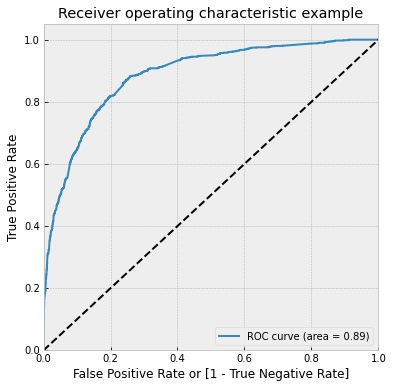

In [340]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

**Observation:**  The area under the ROC curve is 0.89, which indicates the classification model is predicting well.

##  Assign a lead score between 0 and 100 to each of the leads

Assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [341]:
# Assigning lead score for test set 

y_pred_final['Lead_Score'] = round(y_pred_final['Converted_Prob']*100)

In [342]:
#checking lead scores assigned to the leads
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.486197,1,49.0
1,2376,1,0.947184,1,95.0
2,7766,1,0.696132,1,70.0
3,9199,0,0.172331,0,17.0
4,4359,1,0.841735,1,84.0


In [343]:
# Sorting the test data in descending order of lead scores

y_pred_final.sort_values(by='Lead_Score', ascending=False, inplace=True)

In [344]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted,Lead_Score
1242,8107,1,0.995003,1,100.0
739,5586,1,0.995554,1,100.0
605,7187,1,0.997749,1,100.0
603,6243,1,0.997521,1,100.0
478,8055,1,0.995554,1,100.0


## Coefficients of final model in order of priority

In [345]:
coeff = pd.DataFrame(res.params)
coeff.drop("const", inplace=True)
coeff.columns = ["Coefficient"]
coeff["Absolute value"] = abs(coeff["Coefficient"])
coeff.sort_values(by = "Absolute value", ascending = False)

,Coefficient,Absolute value
CurrentOccupation_Working Professional,3.526902,3.526902
LeadOrigin_Lead Add Form,2.511063,2.511063
LeadSource_Welingak Website,1.838957,1.838957
LeadSource_Direct Traffic,-1.474450,1.474450
LastNotableActivity_SMS Sent,1.215475,1.215475
LeadSource_Organic Search,-1.203553,1.203553
LeadSource_Referral Sites,-1.173749,1.173749
LastNotableActivity_Olark Chat Conversation,-1.121322,1.121322
Total Time Spent on Website,1.100342,1.100342
LeadSource_Facebook,-1.039260,1.039260


# Inferences and Conclusion

#### i) The performance metrics of our model are as follows:

- **Train data:**   

    accuracy 79.4%  
    Sensitivity 85.9%  
    Specificity 75.4%  
    Area under the ROC curve 0.88



- **Test data:**  

    accuracy 79.9%  
    Sensitivity  85.5%  
    Specificity 76.3%  
    Area under the ROC curve 0.89

#### ii) The variables which contribute most towards the probability of a lead getting converted are:

- Current Occupation  
- Lead Origin  
- Lead Source  
- Total Time Spent on Website
- LastNotableActivity


#### iIi) The following features impact the leads conversion:

- Working professionals have higher chances of conversion.
- When the Lead Origin is Lead Add form, then there is a higher chance of conversion.
- Leads acquired through Welingak website have higher chance of conversion. Leads acquired through Direct Traffic, Organic Search, Referral sites, Facebook and Google are less likely to convert.
- The chances of conversion increase when the Last Notable activity status is SMS Sent. The chances of conversion decrease when Last Notable activity status is Olark Chat or Modified. 
- Higher the time spent by the customer on the website, they are more likely to convert.

 


